In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
from pyEulerCurves import plot_euler_curve
from pyEulerCurves.ecc_utils import euler_characteristic_list_from_all
%matplotlib notebook

<IPython.core.display.Javascript object>


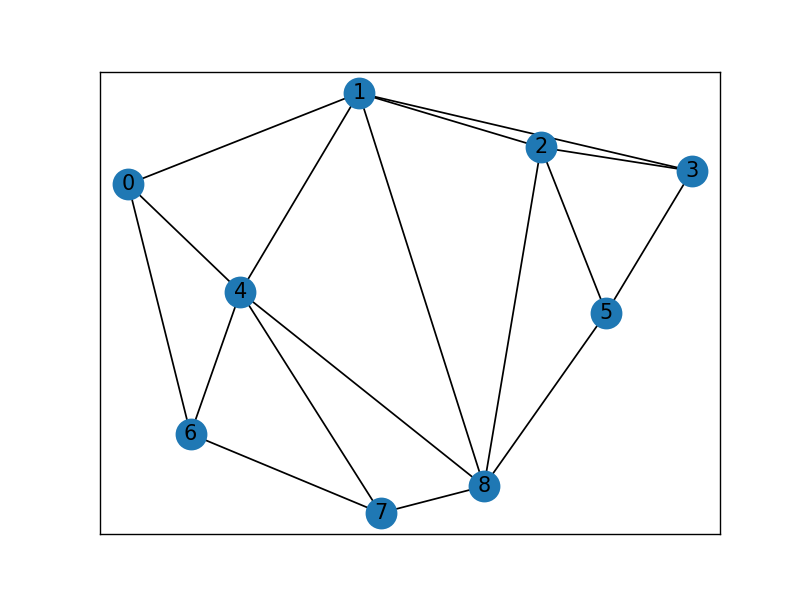

In [2]:
points = np.array([[0.96,3.66],[2.51413,4.15604],[3.74,3.86],[4.75617,3.7317],[1.71611,3.07302],[4.17983,2.95902],[1.38,2.3],[2.6598,1.86966],[3.35648,2.01533]])
plt.scatter(points[:,0], points[:,1])
plt.show()

In [3]:
ac = gd.AlphaComplex(points)
st = ac.create_simplex_tree()

In [4]:
contributions = {}
for s in st.get_simplices():
    print(s)
    if s[1] in contributions:
        contributions[s[1]] = contributions[s[1]]+(-1)**(len(s[0])-1)
    else:
        contributions.update({s[1]:(-1)**(len(s[0])-1)})

([0, 1, 4], 0.6657633375113654)
([0, 1], 0.6653439346250001)
([0, 4, 6], 0.5395203857644151)
([0, 4], 0.2290619631250001)
([0, 6], 0.5395203857644151)
([0], 0.0)
([1, 2, 3], 105.39621913776071)
([1, 2, 8], 1.3244013980552611)
([1, 2], 0.39759923462499996)
([1, 3], 105.39621913776071)
([1, 4, 8], 1.3282012565252002)
([1, 4], 0.4524420602000002)
([1, 8], 1.3244013980552611)
([1], 0.0)
([2, 3, 5], 0.3318977891800927)
([2, 3], 0.2622655897249999)
([2, 5, 8], 1.0454579595810976)
([2, 5], 0.2513038473249998)
([2, 8], 1.0454579595810976)
([2], 0.0)
([3, 5], 0.23230054449999993)
([3], 0.0)
([4, 6, 7], 0.5889781837423322)
([4, 6], 0.1776324631250002)
([4, 7, 8], 1.184891406795301)
([4, 7], 0.5846565264250001)
([4, 8], 1.184891406795301)
([4], 0.0)
([5, 8], 0.3921140096500001)
([5], 0.0)
([6, 7], 0.45577013890000007)
([6], 0.0)
([7, 8], 0.1266456928249999)
([7], 0.0)
([8], 0.0)


In [5]:
#print(contributions.items())
contribution_list = sorted(list(contributions.items()), key=lambda x: x[0])
ecc = euler_characteristic_list_from_all(contribution_list)
print(ecc)
for c in list(contribution_list):
    print(c)

[[0.0, 9], [0.1266456928249999, 8], [0.1776324631250002, 7], [0.2290619631250001, 6], [0.23230054449999993, 5], [0.2513038473249998, 4], [0.2622655897249999, 3], [0.3318977891800927, 4], [0.3921140096500001, 3], [0.39759923462499996, 2], [0.4524420602000002, 1], [0.45577013890000007, 0], [0.5395203857644151, 0], [0.5846565264250001, -1], [0.5889781837423322, 0], [0.6653439346250001, -1], [0.6657633375113654, 0], [1.0454579595810976, 0], [1.184891406795301, 0], [1.3244013980552611, 0], [1.3282012565252002, 1], [105.39621913776071, 1]]
(0.0, 9)
(0.1266456928249999, -1)
(0.1776324631250002, -1)
(0.2290619631250001, -1)
(0.23230054449999993, -1)
(0.2513038473249998, -1)
(0.2622655897249999, -1)
(0.3318977891800927, 1)
(0.3921140096500001, -1)
(0.39759923462499996, -1)
(0.4524420602000002, -1)
(0.45577013890000007, -1)
(0.5395203857644151, 0)
(0.5846565264250001, -1)
(0.5889781837423322, 1)
(0.6653439346250001, -1)
(0.6657633375113654, 1)
(1.0454579595810976, 0)
(1.184891406795301, 0)
(1.32

In [6]:
edges = [s[0] for s in st.get_simplices() if len(s[0]) ==2]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G, pos = points)

<IPython.core.display.Javascript object>


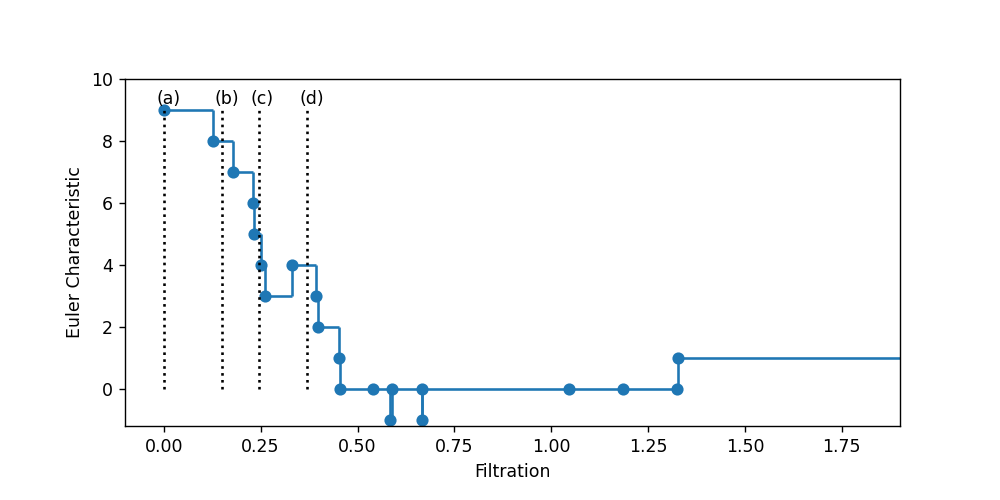

In [40]:
f,ax = plt.subplots(figsize=(8,4))
ecc[-1][0]=2
plot_euler_curve(ecc, ax, with_lines=True)
lbls = ["(a)","(b)","(c)","(d)"]
xvals = [0,0.15,0.245,0.37]
ax.vlines(x = xvals, ymin = 0, ymax=9, ls = ":", color="k")
for i in range(0,4):
    ax.annotate(lbls[i],(xvals[i]-0.02,9.2))
ax.set_aspect(0.08)
ax.set_ylim(-1.2,10)
ax.set_xlim(-0.1,1.9)
plt.savefig("ecc_pointcloud_paper_example.pdf")
plt.show()